In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats

In [4]:
df = pd.read_csv(r'book_info.csv')

In [5]:
df.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Title              830
Author             830
Average Rating     830
No of ratings      830
No of reviews      830
No of pages       2608
No of awards         0
summary            893
Genre             1274
dtype: int64

In [6]:
df = df.dropna( how='any',subset=['Genre', 'summary'])
df.drop_duplicates(keep=False,inplace=True)

In [7]:
df['no of words in title'] = df['Title'].str.count(' ') + 1

In [8]:
df['Genre'].unique()

array(['fantasy', 'young-adult', 'fiction', 'historical', 'non-fiction',
       'sequential-art', 'science-fiction', 'humor', 'horror', 'thriller',
       'romance', 'autobiography', 'history', 'mystery', 'drama',
       'suspense', 'womens-fiction', 'poetry', 'music', 'polyamorous',
       'christian', 'short-stories', 'food-and-drink', 'travel',
       'adventure', 'christian-fiction', 'biography', 'cultural',
       'business', 'paranormal', 'science-fiction-fantasy',
       'realistic-fiction', 'new-adult', 'art', 'dark', 'classics',
       'parenting', 'contemporary', 'childrens', 'philosophy',
       'psychology', 'science', 'erotica', 'spirituality', 'politics',
       'plays', 'lgbt', 'epic', 'religion', 'environment', 'lds',
       'health', 'cities', 'education', 'economics', 'self-help',
       'holiday', 'crime', 'novels', 'feminism', 'media-tie-in',
       'adult-fiction', 'neurodiversity', 'christianity', 'games',
       'academic', 'animals', 'westerns', 'world-war-ii',


As there are a large number of genre categories, we will club the similar ones together-
1. fantasy - shapeshifters, science-fiction-fantasy
2. young-adult - new-adult
3. fiction - womens-fiction, sequential-art, short-stories, childrens, christian-fiction, adult-fiction, realistic-fiction,
contemporary, drama, anthologies, comics
4. historical - history
5. romance
6. mystery - thriller, crime, war, suspense, adventure
7. science-fiction
8. classics
9. horror - paranormal
10. non-fiction - politics, biography, philosophy, self-help, autobiography, cultural, science, music, business, psychology, 
parenting, health, sports, travel, art, lgbt, holiday, food-and-drink, economics, animals, feminism, marriage, education,
humanities, academic, language, sexuality, literature, sports-and-games, amish, computer-science, games, environment, 
family-law, sociology, american, military-history, architecture, leadership, eastern-africa, inspirational, writing, cities, 
relationships, neurodiversity, world-war-ii, 
11. religion - spirituality, christian, christianity, lds


Some of the categories have very few books in them. Thus we'll be dropping all such categories-

reference                    
epic                         
folklore              
neurodiversity        
westerns                
dark                
plays                      
polyamorous          
european-literature         
erotica                  
humor                   
poetry                      
novels                      
media-tie-in               


In [9]:
df["Genre"].replace({"history":"historical", "shapeshifters":"fantasy", "science-fiction-fantasy":"fantasy", "new-adult":"young-adult", "thriller":"mystery", "crime":"mystery", "war":"mystery", "suspense":"mystery", "adventure":"mystery", "paranormal":"horror", "spirituality":"religion", "christian":"religion", "christianity":"religion", "lds":"religion"}, inplace=True)
for i in ["womens-fiction","sequential-art","short-stories","childrens","christian-fiction","adult-fiction","realistic-fiction","contemporary","drama","anthologies","comics"]:
    df["Genre"].replace({i:"fiction"}, inplace=True)
for j in ["politics", "biography", "philosophy", "self-help", "autobiography", "cultural", "science", "music", "business", "psychology", "parenting", "health", "sports", "travel", "art", "lgbt", "holiday", "food-and-drink", "economics", "animals", "feminism", "marriage", "education", "humanities", "academic", "language", "sexuality", "literature", "sports-and-games", "amish", "computer-science", "games", "environment", "family-law", "sociology", "american", "military-history", "architecture", "leadership", "eastern-africa", "inspirational", "writing", "cities", "relationships", "neurodiversity", "world-war-ii"]:
    df["Genre"].replace({j:"non-fiction"}, inplace=True)

In [10]:
rejected = ["reference", "epic", "folklore", "neurodiversity", "westerns", "dark", "plays", "polyamorous", "european-literature", "erotica", "humor", "poetry", "novels", "media-tie-in"]
for i in rejected :
    indexvalue = df[df['Genre'] == i].index
    df.drop(indexvalue , inplace=True)

In [11]:
df['Genre'].value_counts()

fiction            1538
fantasy             928
non-fiction         812
young-adult         614
historical          447
mystery             353
romance             339
horror              223
science-fiction     201
classics            188
religion            116
Name: Genre, dtype: int64

In [12]:
len(df['Genre'].unique())

11

In [13]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

Thus, now we have 11 genres of books in our dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5759 entries, 0 to 7199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 5759 non-null   object
 1   Author                5759 non-null   object
 2   Average Rating        5759 non-null   object
 3   No of ratings         5759 non-null   object
 4   No of reviews         5759 non-null   object
 5   No of pages           4305 non-null   object
 6   No of awards          5759 non-null   int64 
 7   summary               5759 non-null   object
 8   Genre                 5759 non-null   object
 9   no of words in title  5759 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 494.9+ KB


In [15]:
df.head()

,Title,Author,Average Rating,No of ratings,No of reviews,No of pages,No of awards,summary,Genre,no of words in title
0,Harry Potter and the Deathly Hallows,J.K. Rowling,4.61,"3,125,062","71,791",759,8,"It's no longer safe for Harry at Hogwarts, so ...",fantasy,6
1,The Hunger Games,Suzanne Collins,4.32,"7,069,297","180,535",374,41,"Could you survive on your own in the wild, wit...",young-adult,3
2,The Kite Runner,Khaled Hosseini,4.32,"2,669,466","81,081",371,8,"The unforgettable, heartbreaking story of the ...",fiction,3
3,The Book Thief,Markus Zusak,4.38,"2,075,866","122,077",552,20,Librarian's note: An alternate cover edition c...,historical,3
4,Harry Potter and the Half-Blood Prince,J.K. Rowling,4.57,"2,727,012","45,000",450,3,The war against Voldemort is not going well; e...,fantasy,6


## TITLE LENGTH

<AxesSubplot:xlabel='no of words in title', ylabel='count'>

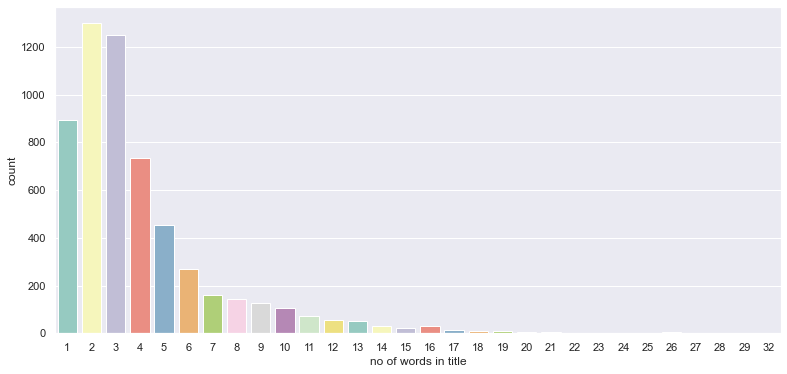

In [16]:
sns.set(rc = {'figure.figsize':(13,6)})
sns.countplot(x="no of words in title", data=df, palette="Set3")

Nearly 50% of the books in our dataset have 2 or 3 words in their title. Majority of books have 5 or less words in their title.

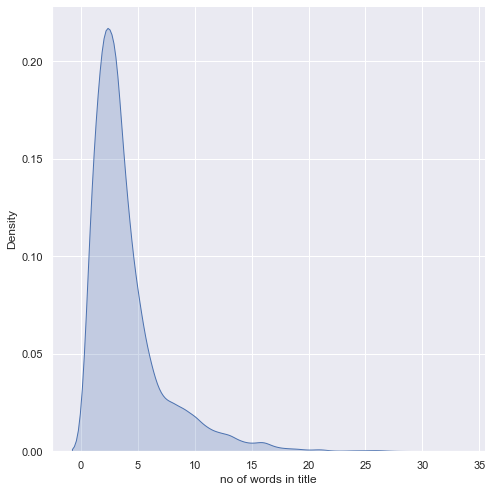

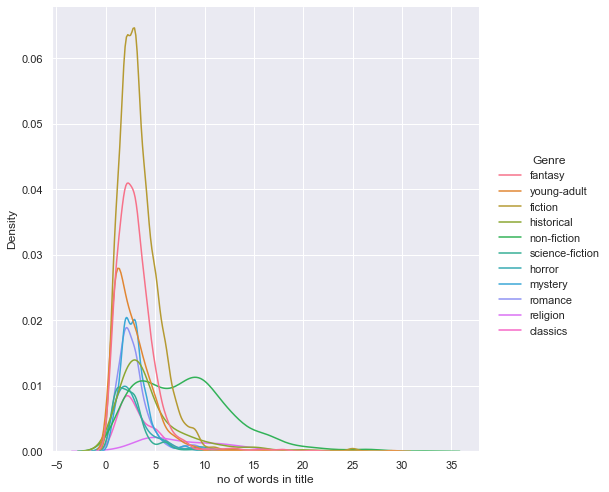

In [17]:
sns.displot(data=df, x="no of words in title", fill=True, hue=None, kind='kde', height=7, aspect=1)
sns.displot(data=df, x="no of words in title", hue="Genre", kind='kde', height=7, aspect=1)

<AxesSubplot:xlabel='no of words in title', ylabel='Proportion'>

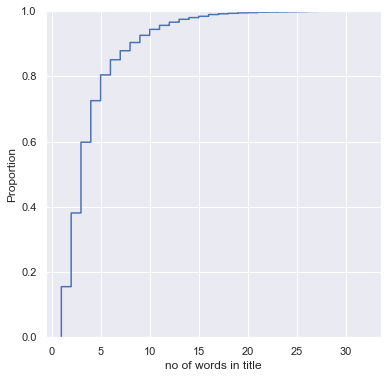

In [18]:
sns.set(rc = {'figure.figsize':(6,6)})
sns.ecdfplot(data=df, x=df['no of words in title'])

80% of the books have 5 or less words in their title

<AxesSubplot:ylabel='no of words in title'>

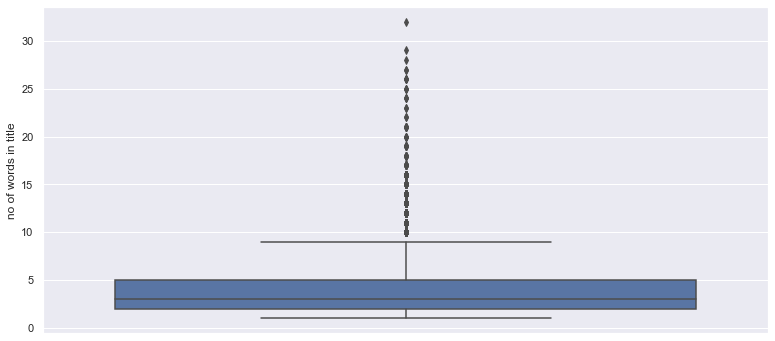

In [20]:
sns.set(rc = {'figure.figsize':(13,6)})
sns.boxplot(y="no of words in title", data=df)

<AxesSubplot:xlabel='Genre', ylabel='no of words in title'>

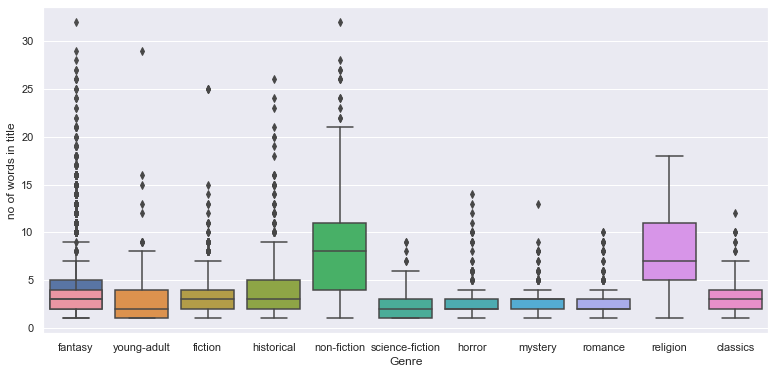

In [21]:
sns.boxplot(x="Genre", y="no of words in title", data=df)

The boxplot shows that -
1. The distribution of book title length is negatively skewed. 50% of the books have a title of length approximaely 3 words or shorter, while 75% of the books have a title of length 5 words or shorter.
1. Maximum variablity in length of title is for non fiction books. Also, non fiction books seem to have the longest titles as 50% of non fiction books have titles of nearly 8 words or less and 75% of non fiction books have 11 worded or shorter titles. These figures are larger than those of books from other genres. 
2. Horror, mystery and romance books tend to have the shortest titles with the least variability.

## AVERAGE RATING

In [22]:
#cleaning the data
df1=df[df['Average Rating']!="it"]
df1=df1[df1['Average Rating']!="Average"]
df1=df1[df1['Average Rating']!="amazing"]

In [23]:
#Converting to int datatype
df1[["Average Rating"]] = df1[["Average Rating"]].apply(pd.to_numeric)

<AxesSubplot:xlabel='Average Rating', ylabel='Count'>

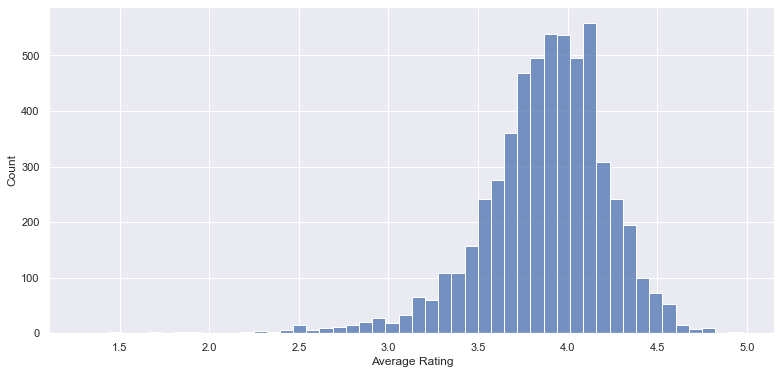

In [24]:
sns.histplot(data=df1, x="Average Rating", bins=50)

Very few books have a rating less than 3.5 or more tha  approx 4.4

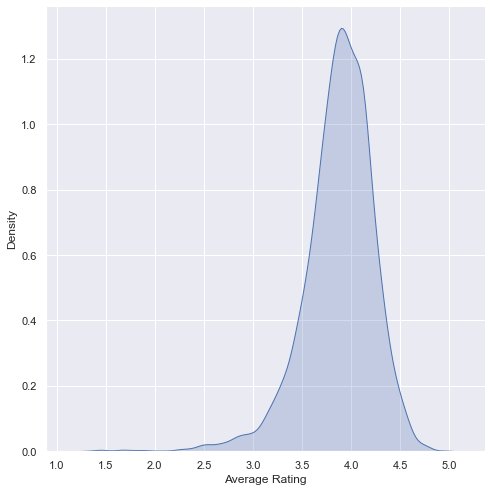

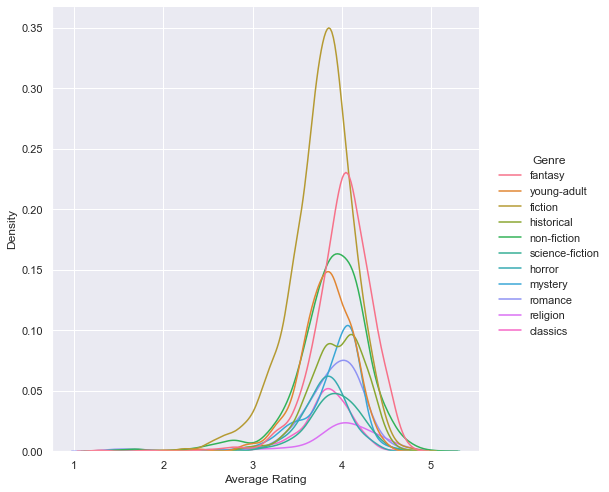

In [25]:
sns.displot(data=df1, x="Average Rating", fill=True, kind="kde", height=7, aspect=1)
sns.displot(data=df1, x="Average Rating", hue="Genre", kind='kde', height=7, aspect=1)

<AxesSubplot:xlabel='Average Rating', ylabel='Proportion'>

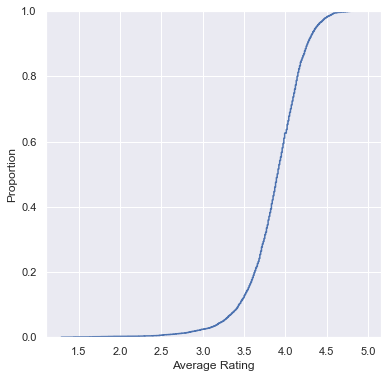

In [114]:
sns.set(rc = {'figure.figsize':(6,6)})
sns.ecdfplot(data=df1, x=df1['Average Rating'])

<AxesSubplot:xlabel='Genre', ylabel='Average Rating'>

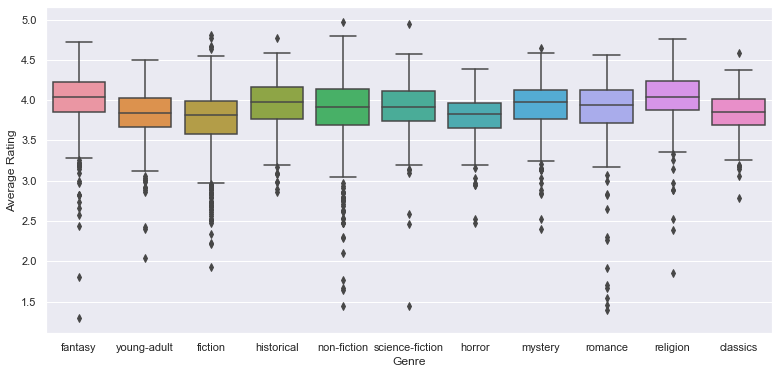

In [115]:
sns.set(rc = {'figure.figsize':(13,6)})
sns.boxplot(x="Genre", y="Average Rating", data=df1)

In [123]:
#df1['No of ratings']=df1['No of ratings'].str.replace(',','')
df1['No of reviews']=df1['No of reviews'].str.replace(',','')

In [135]:
df1["No of ratings"] = df1["No of ratings"].apply(pd.to_numeric)
df1["No of reviews"] = df1["No of reviews"].apply(pd.to_numeric)

<AxesSubplot:xlabel='No of ratings', ylabel='No of reviews'>

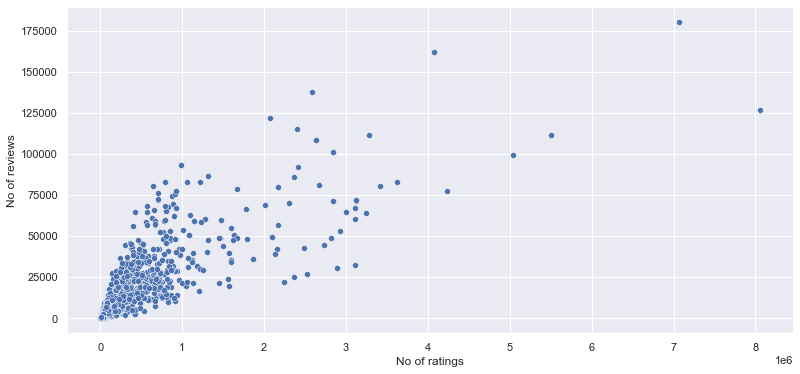

In [125]:
sns.scatterplot(data=df1, x=df1['No of ratings'], y=df1['No of reviews'])

In [143]:
df2 = df1[df1['No of ratings']<1000000]

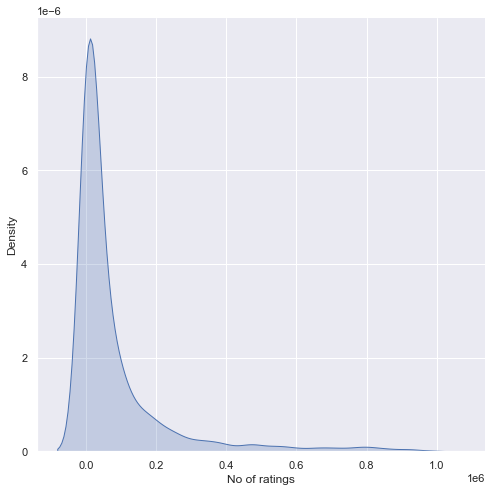

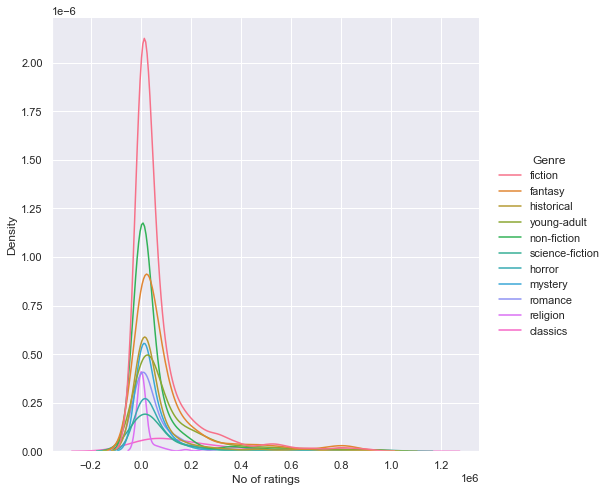

In [144]:
sns.displot(data=df2, x="No of ratings", fill=True, kind="kde", height=7, aspect=1)
sns.displot(data=df2, x="No of ratings", hue="Genre", kind='kde', height=7, aspect=1)

<AxesSubplot:xlabel='No of ratings', ylabel='Proportion'>

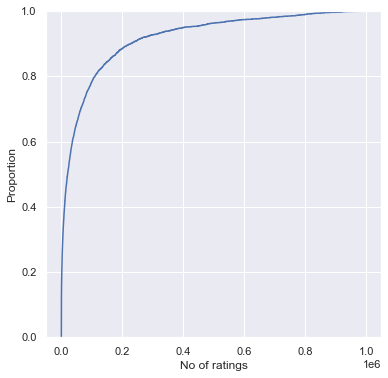

In [147]:
sns.set(rc = {'figure.figsize':(6,6)})
sns.ecdfplot(data=df2, x='No of ratings')

<AxesSubplot:xlabel='Genre', ylabel='No of ratings'>

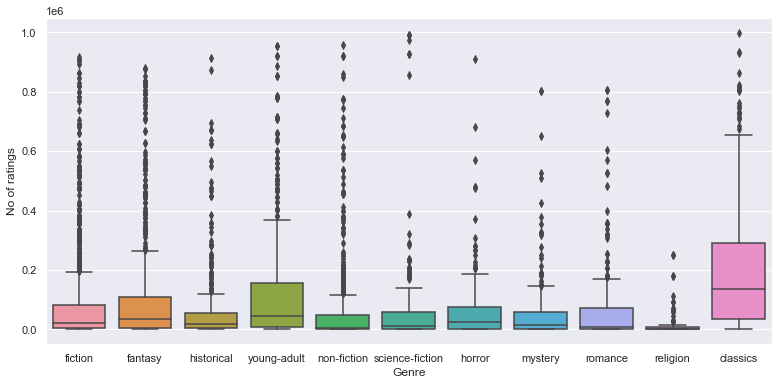

In [148]:
sns.set(rc = {'figure.figsize':(13,6)})
sns.boxplot(x="Genre", y="No of ratings", data=df2)

In [149]:
df2 = df1[df1['No of reviews']<75000]

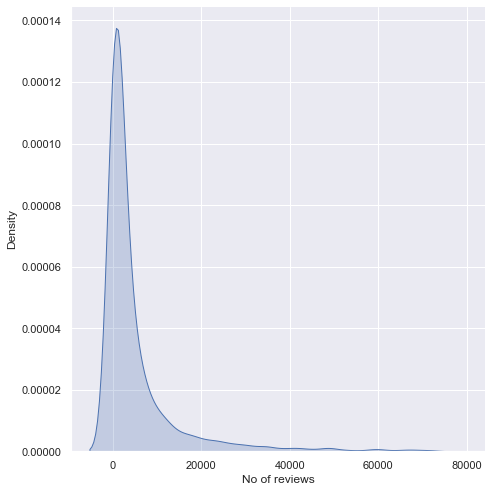

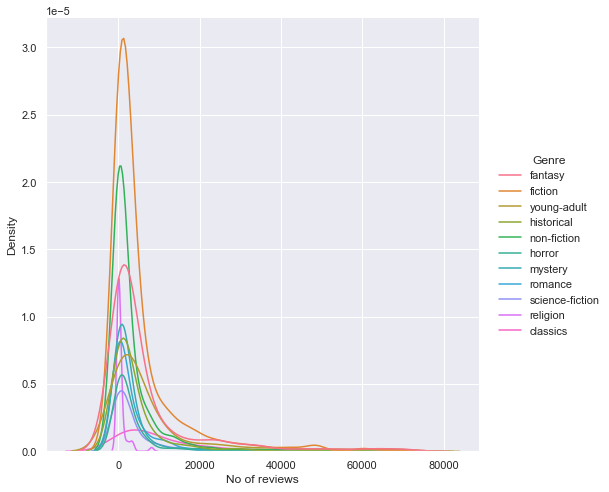

In [150]:
sns.displot(data=df2, x="No of reviews", fill=True, kind="kde", height=7, aspect=1)
sns.displot(data=df2, x="No of reviews", hue="Genre", kind='kde', height=7, aspect=1)

<AxesSubplot:xlabel='No of reviews', ylabel='Proportion'>

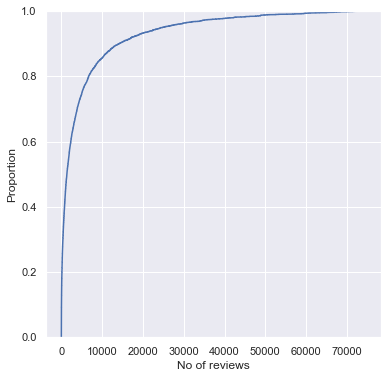

In [151]:
sns.set(rc = {'figure.figsize':(6,6)})
sns.ecdfplot(data=df2, x='No of reviews')

<AxesSubplot:xlabel='Genre', ylabel='No of reviews'>

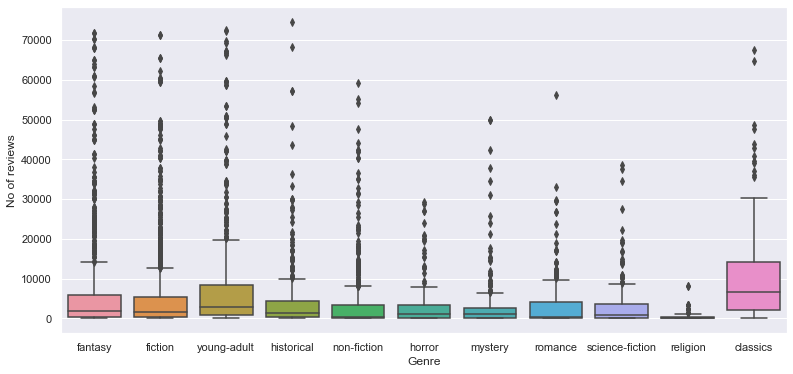

In [152]:
sns.set(rc = {'figure.figsize':(13,6)})
sns.boxplot(x="Genre", y="No of reviews", data=df2)

<AxesSubplot:xlabel='No of awards', ylabel='Count'>

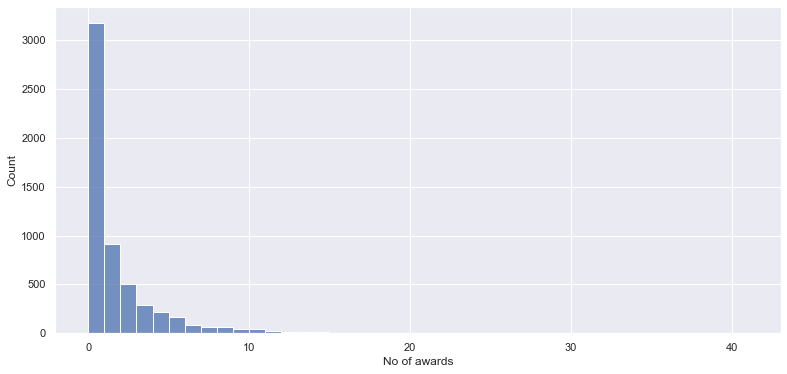

In [164]:
sns.histplot(data=df1, x="No of awards", bins=41)

<ipython-input-163-aaf91fb3fbc1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df1[df['No of awards']>5]


<AxesSubplot:xlabel='No of awards', ylabel='Count'>

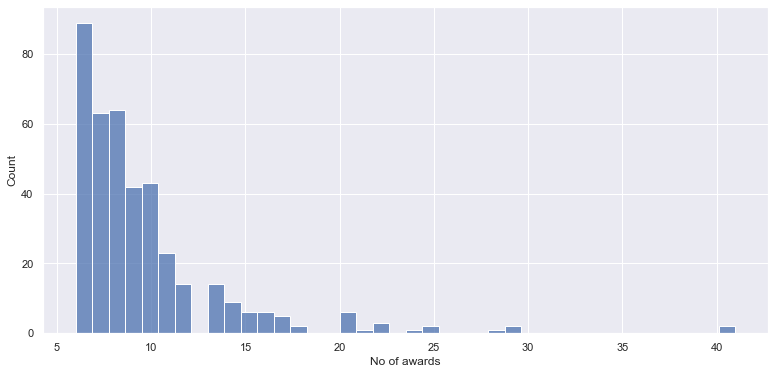

In [163]:
df2 = df1[df['No of awards']>5]
sns.histplot(data=df2, x="No of awards", bins=40)

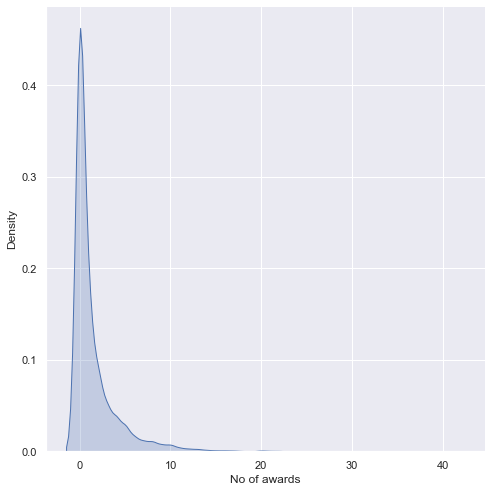

In [170]:
sns.displot(data=df, x="No of awards", fill=True, kind="kde", height=7, aspect=1)

<AxesSubplot:xlabel='No of awards', ylabel='Proportion'>

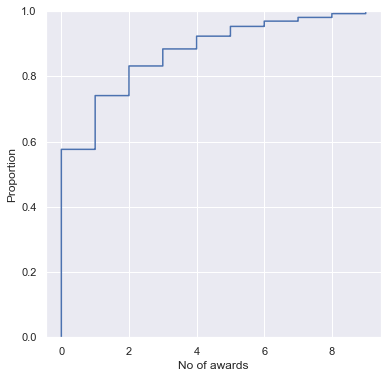

In [171]:
sns.set(rc = {'figure.figsize':(6,6)})
sns.ecdfplot(data=df2, x='No of awards')

<AxesSubplot:xlabel='Genre', ylabel='No of awards'>

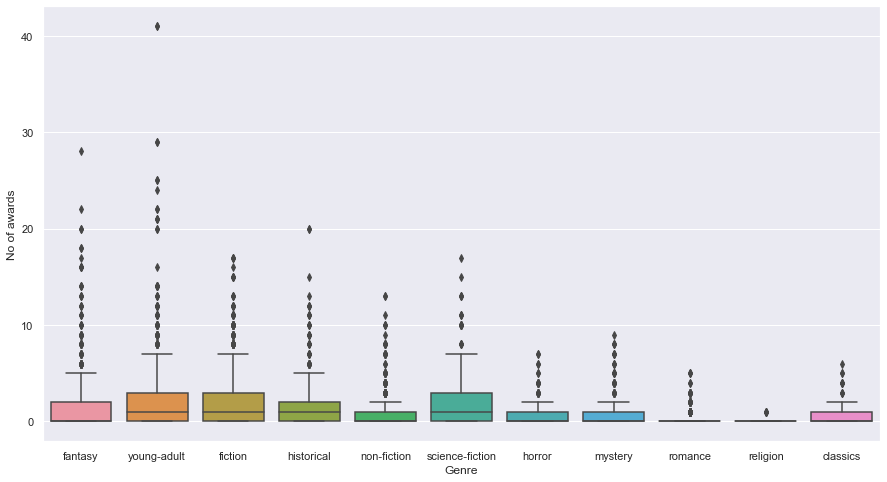

In [53]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x="Genre", y="No of awards", data=df)

In [175]:
df1 = df1[["Average Rating", "No of ratings", "No of reviews", "No of awards", "no of words in title"]]
df1

,Average Rating,No of ratings,No of reviews,No of awards,no of words in title
0,4.61,3125062.0,71791,8,6
1,4.32,7069297.0,180535,41,3
2,4.32,2669466.0,81081,8,3
3,4.38,2075866.0,122077,20,3
4,4.57,2727012.0,45000,3,6
...,...,...,...,...,...
7195,3.46,1525.0,95,0,4
7196,3.62,7420.0,835,0,1
7197,3.97,3036.0,442,0,1
7198,4.40,927421.0,77421,10,2


In [71]:
df1.corr(method='pearson')

,Average Rating,No of ratings,No of reviews,No of awards,no of words in title
Average Rating,1.000000,0.160176,0.196356,0.143813,0.039553
No of ratings,0.160176,1.000000,0.846007,0.487163,-0.039716
No of reviews,0.196356,0.846007,1.000000,0.567223,-0.054532
No of awards,0.143813,0.487163,0.567223,1.000000,-0.075853
no of words in title,0.039553,-0.039716,-0.054532,-0.075853,1.000000


In [72]:
x = df1['No of ratings']
y = df1['No of reviews']
scipy.stats.pearsonr(x, y)

(0.8460067196480086, 0.0)

<AxesSubplot:xlabel='No of ratings', ylabel='No of reviews'>

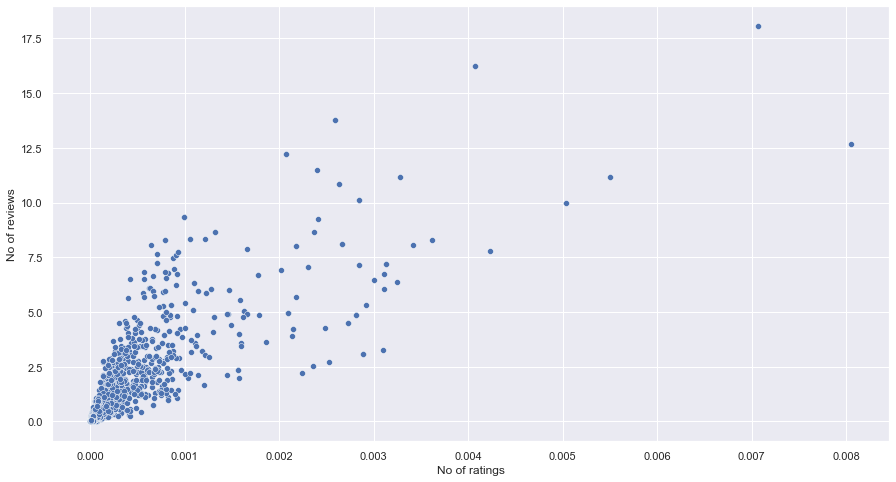

In [73]:
sns.scatterplot(data=df1, x=df1['No of ratings'], y=df1['No of reviews'])